First Step is to import the base libraries we will be making use of in our project


In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Since our csv file containes more than 60 columns, we will use the following line of code
pd.set_option('display.max_columns', None)

After completing the required steps, let us now load the data into our python program.


In [3]:
data = pd.read_csv("D:\Syntegon\python\Sales\supply_chain_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Paras\AppData\Local\Temp\ipykernel_19512\42726032.py:1: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv("D:\Syntegon\python\Sales\supply_chain_data.csv")


In [4]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
data.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [7]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [8]:
data = pd.get_dummies(data, columns=["Product type","Customer demographics","Location", "Inspection results", "Transportation modes", "Routes", "Shipping carriers", "Supplier name"])
data.columns

Index(['SKU', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities',
       'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Defect rates',
       'Costs', 'Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'Customer demographics_Female',
       'Customer demographics_Male', 'Customer demographics_Non-binary',
       'Customer demographics_Unknown', 'Location_Bangalore',
       'Location_Chennai', 'Location_Delhi', 'Location_Kolkata',
       'Location_Mumbai', 'Inspection results_Fail', 'Inspection results_Pass',
       'Inspection results_Pending', 'Transportation modes_Air',
       'Transportation modes_Rail', 'Transportation modes_Road',
       'Transportation modes_Sea', 'Routes_Route A', 'Routes_Route B',
       'Routes_Route C', 'Shipping carriers_Carrier A',
       'Shipping carriers_Carrier B',

In [9]:
added_cols = ['Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'Customer demographics_Female', 'Customer demographics_Male', 'Customer demographics_Non-binary',
       'Customer demographics_Unknown', 'Location_Bangalore', 'Location_Chennai', 'Location_Delhi', 'Location_Kolkata', 'Location_Mumbai',
       'Inspection results_Fail', 'Inspection results_Pass', 'Inspection results_Pending', 'Transportation modes_Air',
       'Transportation modes_Rail', 'Transportation modes_Road', 'Transportation modes_Sea', 'Routes_Route A', 'Routes_Route B',
       'Routes_Route C','Shipping carriers_Carrier A',
       'Shipping carriers_Carrier B', 'Shipping carriers_Carrier C',
       'Supplier name_Supplier 1', 'Supplier name_Supplier 2',
       'Supplier name_Supplier 3', 'Supplier name_Supplier 4',
       'Supplier name_Supplier 5']
data[added_cols].head()

,Product type_cosmetics,Product type_haircare,Product type_skincare,Customer demographics_Female,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai,Inspection results_Fail,Inspection results_Pass,Inspection results_Pending,Transportation modes_Air,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
0,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False
1,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False
2,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False
3,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True
4,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False


In [10]:
data.replace({True: 1}, inplace=True)
data.replace({False: 0}, inplace=True)

C:\Users\Paras\AppData\Local\Temp\ipykernel_19512\410984546.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({False: 0}, inplace=True)


In [11]:
data[added_cols].head()

,Product type_cosmetics,Product type_haircare,Product type_skincare,Customer demographics_Female,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai,Inspection results_Fail,Inspection results_Pass,Inspection results_Pending,Transportation modes_Air,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [12]:
data = data.rename(columns={'Lead times': 'Processing Lead Times', 'Lead time' : 'Shipping Lead Times', 'Manufacturing lead time':'Manufacturing Lead Times'})
data

,SKU,Price,Availability,Number of products sold,Revenue generated,Stock levels,Processing Lead Times,Order quantities,Shipping times,Shipping costs,Shipping Lead Times,Production volumes,Manufacturing Lead Times,Manufacturing costs,Defect rates,Costs,Product type_cosmetics,Product type_haircare,Product type_skincare,Customer demographics_Female,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai,Inspection results_Fail,Inspection results_Pass,Inspection results_Pending,Transportation modes_Air,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
0,SKU0,69.808006,55,802,8661.996792,58,7,96,4,2.956572,29,215,29,46.279879,0.226410,187.752075,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,SKU1,14.843523,95,736,7460.900065,53,30,37,2,9.716575,23,517,30,33.616769,4.854068,503.065579,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,SKU2,11.319683,34,8,9577.749626,1,10,88,2,8.054479,12,971,27,30.688019,4.580593,141.920282,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
3,SKU3,61.163343,68,83,7766.836426,23,13,59,6,1.729569,24,937,18,35.624741,4.746649,254.776159,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,SKU4,4.805496,26,871,2686.505152,5,3,56,8,3.890548,5,414,3,92.065161,3.145580,923.440632,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SKU95,77.903927,65,672,7386.363944,15,14,26,9,8.630339,18,450,26,58.890686,1.210882,778.864241,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
96,SKU96,24.423131,29,324,7698.424766,67,2,32,3,5.352878,28,648,28,17.803756,3.872048,188.742141,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
97,SKU97,3.526111,56,62,4370.916580,46,19,4,9,7.904846,10,535,13,65.765156,3.376238,540.132423,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
98,SKU98,19.754605,43,913,8525.952560,53,1,27,7,1.409801,28,581,9,5.604691,2.908122,882.198864,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [13]:
data['Risky'] = 0
data.loc[data['Inspection results_Fail']==1, 'Risky'] = 1
data['Caution'] = 0
data.loc[data['Inspection results_Pending']==1, 'Caution'] = 1
data['Safe'] = 0
data.loc[data['Inspection results_Pass']==1, 'Safe'] = 1

In [14]:
columns = ['Inspection results_Fail', 'Inspection results_Pending','Inspection results_Pass', 'Risky', 'Caution', 'Safe']
data[columns].head()

,Inspection results_Fail,Inspection results_Pending,Inspection results_Pass,Risky,Caution,Safe
0,0,1,0,0,1,0
1,0,1,0,0,1,0
2,0,1,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [15]:
from torch import tensor
dep = ['Risky']
indep_cols = ['Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Processing Lead Times',
       'Order quantities', 'Shipping times', 'Shipping costs',
       'Shipping Lead Times', 'Production volumes', 'Manufacturing Lead Times',
       'Manufacturing costs', 'Defect rates', 'Costs',
       'Supplier name_Supplier 1', 'Supplier name_Supplier 2',
       'Supplier name_Supplier 3', 'Supplier name_Supplier 4',
       'Supplier name_Supplier 5']
t_indep = tensor(data[indep_cols].values, dtype=torch.float)
t_dep1 = tensor(data.Risky)

In [16]:
t_indep

tensor([[ 69.8080,  55.0000, 802.0000,  ...,   1.0000,   0.0000,   0.0000],
        [ 14.8435,  95.0000, 736.0000,  ...,   1.0000,   0.0000,   0.0000],
        [ 11.3197,  34.0000,   8.0000,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [  3.5261,  56.0000,  62.0000,  ...,   0.0000,   1.0000,   0.0000],
        [ 19.7546,  43.0000, 913.0000,  ...,   0.0000,   0.0000,   1.0000],
        [ 68.5178,  17.0000, 627.0000,  ...,   0.0000,   0.0000,   0.0000]])

In [17]:
t_dep1

tensor([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1])

In [18]:
t_indep.shape

torch.Size([100, 20])

In [19]:
torch.manual_seed(442)
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411,  0.0489,  0.0866])

In [20]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep/vals
t_indep

tensor([[0.7039, 0.5500, 0.8052,  ..., 1.0000, 0.0000, 0.0000],
        [0.1497, 0.9500, 0.7390,  ..., 1.0000, 0.0000, 0.0000],
        [0.1141, 0.3400, 0.0080,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0356, 0.5600, 0.0622,  ..., 0.0000, 1.0000, 0.0000],
        [0.1992, 0.4300, 0.9167,  ..., 0.0000, 0.0000, 1.0000],
        [0.6909, 0.1700, 0.6295,  ..., 0.0000, 0.0000, 0.0000]])

In [21]:
t_indep*coeffs

tensor([[-0.3258,  0.0762,  0.1940,  ..., -0.2411,  0.0000,  0.0000],
        [-0.0693,  0.1317,  0.1780,  ..., -0.2411,  0.0000,  0.0000],
        [-0.0528,  0.0471,  0.0019,  ..., -0.0000,  0.0000,  0.0000],
        ...,
        [-0.0165,  0.0776,  0.0150,  ..., -0.0000,  0.0489,  0.0000],
        [-0.0922,  0.0596,  0.2208,  ..., -0.0000,  0.0000,  0.0866],
        [-0.3198,  0.0236,  0.1517,  ..., -0.0000,  0.0000,  0.0000]])

In [22]:
preds = (t_indep*coeffs).sum(axis=1)
preds[:10]

tensor([-0.0298,  0.1410,  0.9806,  0.3370,  0.7899,  0.3925,  0.2642, -0.7174,
         0.0104, -0.0097])

In [23]:
loss = torch.abs(preds-t_dep1).mean()
loss

tensor(0.5234)

In [24]:
def calc_preds(coeffs, indeps):
  return (indeps*coeffs).sum(axis=1)

def calc_loss(coeffs, indeps, deps):
  return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [25]:
coeffs.requires_grad_()
loss = calc_loss(coeffs, t_indep, t_dep1)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep1))

tensor(0.5180)


In [26]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(data)
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep1[trn_split],t_dep1[val_split]
len(trn_indep),len(val_indep)

(80, 20)

In [27]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

def init_coeffs():
  return (torch.rand(n_coeff)-0.5).requires_grad_()

def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [28]:
coeffs = train_model(18, lr = 0.01)

0.542; 0.542; 0.541; 0.540; 0.540; 0.539; 0.538; 0.538; 0.537; 0.537; 0.536; 0.535; 0.535; 0.534; 0.534; 0.533; 0.533; 0.532; 

In [29]:
def show_coeffs():
  return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Price': tensor(-0.4410),
 'Availability': tensor(0.1350),
 'Number of products sold': tensor(0.2403),
 'Revenue generated': tensor(-0.2203),
 'Stock levels': tensor(-0.2563),
 'Processing Lead Times': tensor(-0.3047),
 'Order quantities': tensor(0.4794),
 'Shipping times': tensor(0.3141),
 'Shipping costs': tensor(0.2819),
 'Shipping Lead Times': tensor(-0.4210),
 'Production volumes': tensor(0.2056),
 'Manufacturing Lead Times': tensor(0.3439),
 'Manufacturing costs': tensor(0.1767),
 'Defect rates': tensor(0.2411),
 'Costs': tensor(-0.3464),
 'Supplier name_Supplier 1': tensor(-0.0052),
 'Supplier name_Supplier 2': tensor(-0.1841),
 'Supplier name_Supplier 3': tensor(-0.2316),
 'Supplier name_Supplier 4': tensor(0.0534),
 'Supplier name_Supplier 5': tensor(0.0889)}

In [30]:
preds = calc_preds(coeffs, val_indep)
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([False,  True,  True,  True,  True,  True, False,  True, False, False,
         True,  True,  True,  True, False,  True])

In [31]:
def acc(coeffs):
  return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.6500)

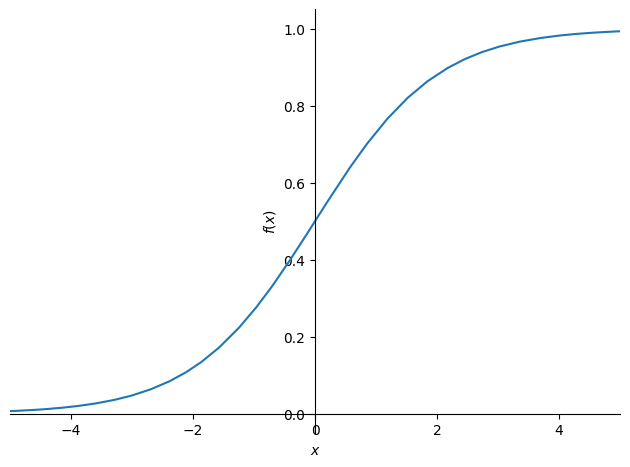

In [32]:
import sympy
sympy.plot(sympy.S('1/(1+exp(-x))'), xlim = (-5,5));

In [33]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))
coeffs = train_model(lr=100)

0.502; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 

In [34]:
acc(coeffs)

tensor(0.7000)

In [35]:
def calc_preds(coeffs, indeps):
  return torch.sigmoid(indeps@coeffs)
def init_coeffs():
  return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [36]:
def init_coeffs(n_hidden = 20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden,1) - 0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [37]:
import torch.nn.functional as F
def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)
def update_coeffs(coeffs,lr):
    for layer in coeffs:
        layer.sub_(layer.grad*lr)
        layer.grad.zero_()
coeffs = train_model(lr=20)

0.537; 0.452; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 

In [38]:
acc(coeffs)

tensor(0.7000)

In [39]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [40]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [41]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [42]:
coeffs = train_model(lr=4)

0.557; 0.484; 0.434; 0.377; 0.376; 0.376; 0.376; 0.376; 0.376; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 

In [43]:
acc(coeffs)

tensor(0.7000)